# Práctico 2 Procesamiento de Imágenes


***

## Grupo Cromático:  
- Clara Quintana	30899597  
- Belen Casalotti	32772856  
- Leandro Bognino	36887290  

## Profesor:  
- Claudio Delrieux  
  Laboratorio de Ciencias de las Imágenes – UNS -CONICET  
  cad@uns.edu.ar

___

### Dependencias e inclusión de librerías

In [1]:
!pip install pillow

In [2]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import cm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9pqke7gq because the default path (/home/lborgnino/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


# Ejercicio 2

## Ejercicio 2.1  
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:

- 1 Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.  
- 2 Detectores de bordes: Laplacianov4, Sobel4 orientaciones.  
- 3 Pasabanda.  

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma-temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kerneles 3x3y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

### 0. Lectura de imagen

In [3]:
im = Image.open("edificios.jpg")
print (im.size, im.mode, im.format)

(880, 660) RGB JPEG


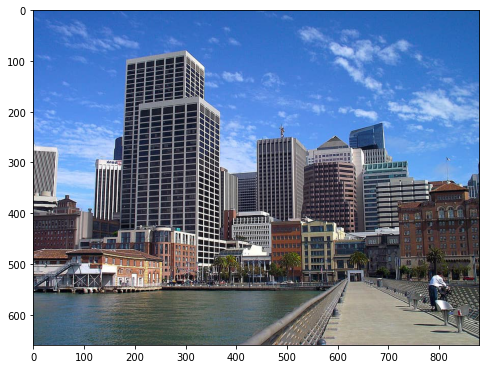

In [4]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

### 1. Normalizar los valores de RGB del pixel 

In [5]:
im_np = np.asarray(im)

In [6]:
im_np = im_np/256

### 2. RGB -> YIQ

In [7]:
RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                          [ 0.595716, -0.274453, -0.321263], 
                          [ 0.211456, -0.522591, 0.311135]])

YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                          [1, -0.2721, -0.6474], 
                          [1, -1.1070, 1.7046]])

In [8]:
def rgb_yiq(im_np, source='yiq'):
    im_yiq =  np.copy(im_np)
    for i in range(len(im_np)):
        for j in range(len(im_np[0])):
            if (source == 'rgb'):
                im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(im_np[i][j])
            else:
                im_yiq[i][j] = YIQ_2_RGB_MATRIX.dot(im_np[i][j])
    return im_yiq

#im_yiq = RGB_2_YIQ_MATRIX.dot(im_np)

### 3. Función de Filtrado

In [9]:
def filter_image(image, kernel):
    imagen_filtrada = np.copy(image)
    imagen_con_borde = np.pad(np.copy(image), pad_width=int(len(kernel)/2), mode='reflect')
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            block = imagen_con_borde[i:i+len(kernel), j:j+len(kernel)]
            block = block* kernel
            block = block.sum() 
            if (kernel.sum() != 0):
                block = block / kernel.sum()
            if (block > 1):
                block = 1.
            if block < 0:
                block = 0.
            imagen_filtrada[i][j] = block
    return imagen_filtrada

### Filtro Sobel

In [10]:
kernel_sobel = np.array([[ -1, 0, 1], 
                        [ -2, 0, 2], 
                        [ -1, 0, 1]])


In [11]:
im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_sobel)

In [12]:
im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

In [13]:
image_rgb = Image.fromarray(np.uint8(image_rgb*255))

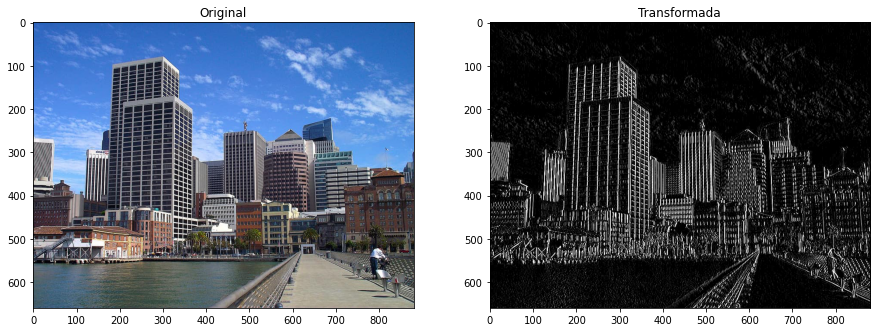

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

ax1.set_title('Original')
ax1.imshow(im)

ax2.set_title('Transformada')
ax2.imshow(image_rgb)